In [2]:
library(dplyr)
library(ggplot2)
library(ggrepel)
library(patchwork)
library(grid)
library(pheatmap)
library(RColorBrewer)
library(Matrix)
library(fitdistrplus)
library(data.table)
source("/projects/ps-renlab2/y2xie/scripts/Paired-HiC/phc_help.R")
source("/projects/ps-renlab2/y2xie/scripts/basics.R")


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select


Loading required package: survival


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘reshape2’


The following objects are masked from ‘package:data.table’:

    dcast, melt




## Plot clonality change (Fig.4C-D)

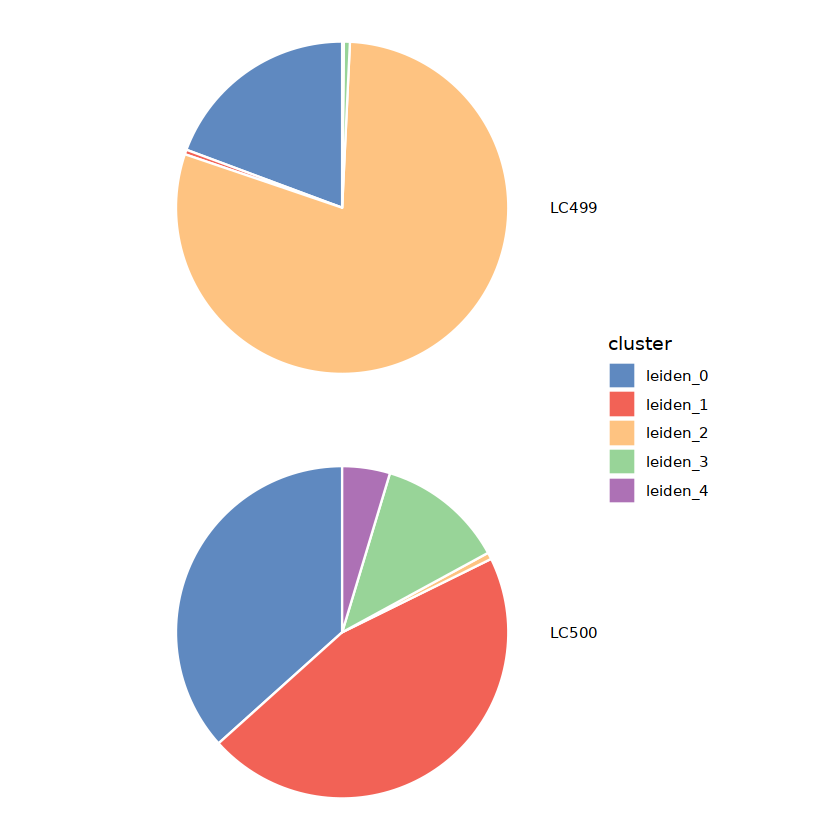

In [274]:
### cell embedding and clustering is performed using higashi (https://github.com/ma-compbio/Higashi)
meta1 <- read.table("230320/GBM_230826_higashi_clustering_cluster.info.txt", header = T)
t1 <- table(meta1[,c("library", "cluster")]) %>%
as.data.frame() %>%
ggplot(aes(x = "", y = Freq, fill = cluster)) +
geom_col(position = "fill", color = "white", alpha = 0.8) + 
coord_polar("y", start=0) + 
theme_void() + 
scale_fill_manual(values = c("#386cb0",  "#ef3b2c", "#fdb462", "#7fc97f","#984ea3")) + 
facet_grid(library ~ .)

t1

ggsave(t1, filename = "plot/GBM_230826_higashi_clustering_pct_change.pdf", dpi = 300, height = 10, width = 5)
write.table(t1$data, "plot/GBM_230826_higashi_clustering_pct_change.txt", sep = "\t", quote = F)

## Plot ecDNA local structure (Fig.4G)

In [85]:
### ec_count is from deep learning model based ecDNA finder
ec_count <- read.table("GBM_231227_LC499_LC500_ecDNA_count_JC.xls", header = T)
valid_cells <- ec_count %>% filter(MYC > 0) %>% rownames

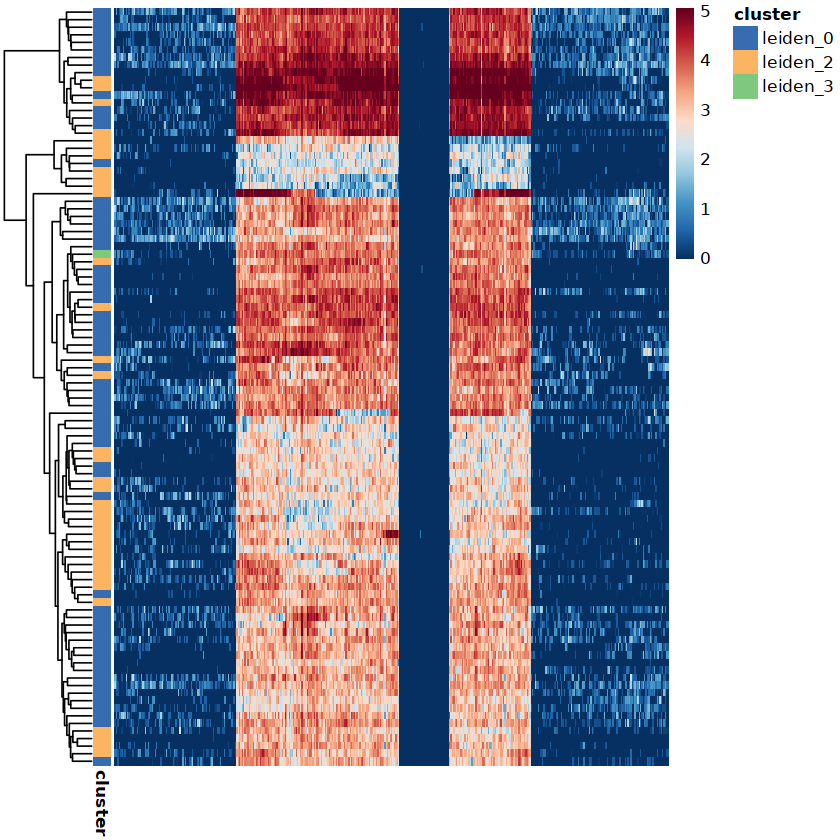

In [181]:
meta1 <- read.table("230320/GBM_230826_higashi_clustering_cluster.info.txt", header = T)
rownames(meta1) <- paste0(meta1$library, "_", meta1$barcode)
dmtp_cnv$bin <- paste0(dmtp_cnv$chrom, "_", dmtp_cnv$start)
bd <- dmtp_cnv[dmtp_cnv$sample %in% valid_cells, c("bin", "residuals", "sample")] %>%
reshape2::dcast(sample ~ bin, value.var = "residuals") %>%
tibble::column_to_rownames("sample")

bd[bd > 32] <- 32
mtp <- bd[1:100,]
row_anno <- meta1[match(rownames(mtp), rownames(meta1)), "cluster", drop = F]

ann_colors = list(cluster = c(leiden_0 = "#386cb0", leiden_2 = "#fdb462", leiden_3 = "#7fc97f"))

t1 <- log2(mtp + 1) %>% 
pheatmap(border_color = NA, cluster_rows = T, cluster_cols = F, show_colnames = F,
         annotation_row = row_anno, annotation_colors = ann_colors,
         # annotation_col = col_anno,
         show_rownames = F, color = colorRampPalette(rev(brewer.pal(n = 10, name = "RdBu")))(255))

ggsave(t1, filename = "plot/GBM_230826_LC499_chr8_126-5_130-5_reads_ecMYC_positive_cells.pdf", 
       dpi = 300, height = 4, width = 6)
write.table(rownames(bd[1:100,]), "GBM_230826_LC499_chr8_126-5_130-5_reads_ecMYC_positive_cells.txt", sep = "\t", 
            quote = F, row.names = F, col.names = F)

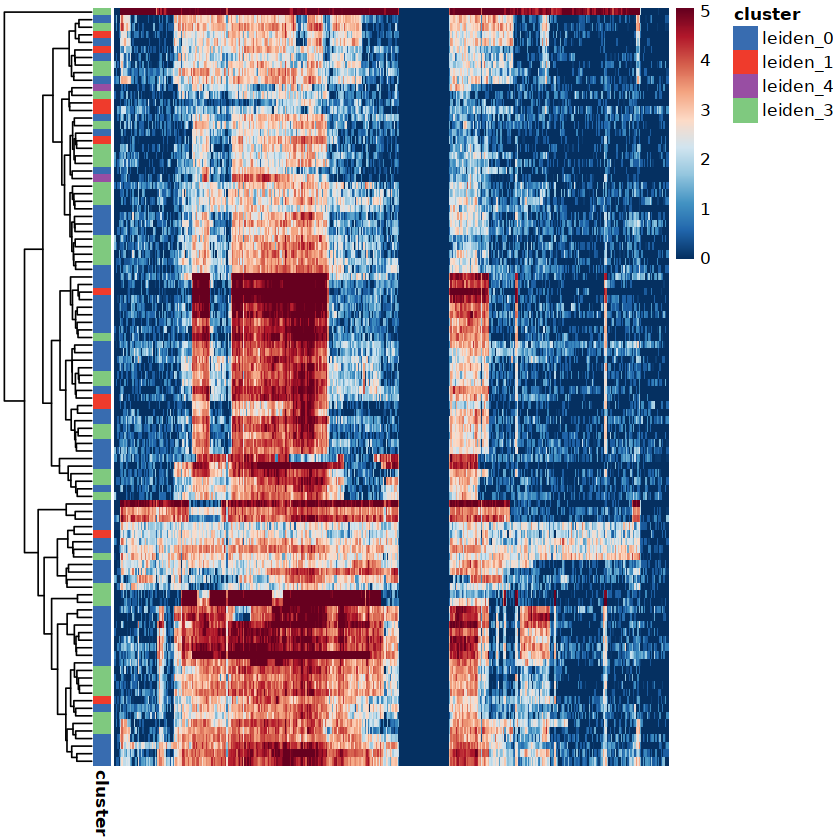

In [189]:
hsrtp_cnv$bin <- paste0(hsrtp_cnv$chrom, "_", hsrtp_cnv$start)
bd <- hsrtp_cnv[hsrtp_cnv$sample %in% valid_cells, c("bin", "residuals", "sample")] %>%
reshape2::dcast(sample ~ bin, value.var = "residuals") %>%
tibble::column_to_rownames("sample")

bd[bd > 32] <- 32
mtp <- bd[1:100,]
row_anno <- meta1[match(rownames(mtp), rownames(meta1)), "cluster", drop = F]

ann_colors = list(cluster = c(leiden_0 = "#386cb0", leiden_1 = "#ef3b2c", 
                              leiden_4 = "#984ea3", leiden_3 = "#7fc97f"))

t1 <- log2(mtp + 1) %>% 
pheatmap(border_color = NA, cluster_rows = T, cluster_cols = F, show_colnames = F,
         annotation_row = row_anno, annotation_colors = ann_colors, 
         # annotation_col = col_anno,
         #gaps_row = gap_row,
         show_rownames = F, color = colorRampPalette(rev(brewer.pal(n = 10, name = "RdBu")))(255))

ggsave(t1, filename = "plot/GBM_230826_LC500_chr8_126-5_130-5_reads_ecMYC_positive_cells.pdf", 
       dpi = 300, height = 4, width = 6)
write.table(rownames(bd[1:100,]), "GBM_230826_LC500_chr8_126-5_130-5_reads_ecMYC_positive_cells.txt", sep = "\t", 
            quote = F, row.names = F, col.names = F)